<a href="https://colab.research.google.com/github/FGalvao77/data-science/blob/main/Prevendo_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **`O que é diabetes?`**
 
_Diabetes, conhecida cientificamente como **Diabetes mellitus**, é uma doença metabólica crônica caracterizada pelo aumento, falta e ou má absorção de insulina, hormônio que promove o aproveitamento da glicose como energia para o corpo._


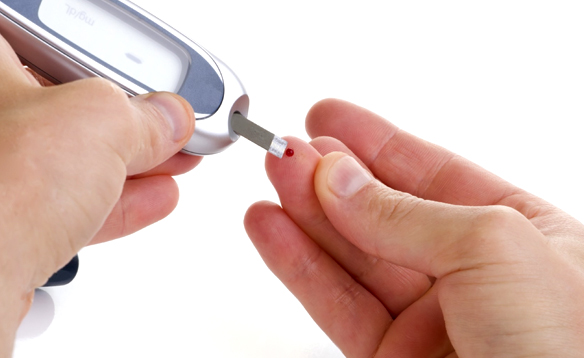

A doença é considerada `o mal do século` pelos orgãos de saúde internacionais e, de acordo com a [OMS](https://www.paho.org/bra/index.php?option=com_content&view=article&id=394:diabetes-mellitus&Itemid=463) – [**Organização Mundial da Saúde**](https://www.paho.org/pt/brasil) -, cerca de 16 milhões de brasileiros sofrem com a diabetes e segundo o mesmo orgão nos últimos dez anos a taxa de incidência cresceu mais de 60%. Por isso, foi acesso um alerta quanto a qualidade de vida da população.

Este problema ganhou destaque nos orgãos públicos, onde já há projetos de estudos para prevenção e tratamentos de diabetes.

##[Câmara analisa propostas para combater disseminação de diabetes](https://www.camara.leg.br/noticias/707533-camara-analisa-propostas-para-combater-disseminacao-de-diabetes/)

_Projetos sugerem desde a criação de centros para o atendimento integral ao diabético no SUS até a isenção de impostos e oferecimento de merenda escolar especial para quem tem a doença, que atinge mais de 16 milhões de brasileiros_ 
 - 13/11/2020 - 14:12  

Fonte: Agência Câmara de Notícias

Até planos privados de sáude já adotam iniciativas para prevenção do problema de diabetes

[DIABETES – O MAL DO SÉCULO QUE CRESCE A CADA ANO](https://www.unimedcampinas.com.br/Novidades/Interna/MzQx/diabetes-medicina-preventiva-unimed-campinas)
 - PUBLICADO 02/01/2019



Portanto é de interesse comum, seja ele público ou privado, que esse `mal do século` tenha um cuidado em especial com políticas de saúde para diminuição da incidência da doença na população em geral.

Como estudo e conhecimento foi elaborado essa análise de dados sobre algumas informações comportamentais de indivíduos. Essa base de dados foi coletado por meio de questionários diretos de pacientes do
`Hospital de Diabetes Sylhet em Sylhet de Bangladesh`, e aprovado por um médico.

Mas como efeito de predição ela nos fornece algumas informações importantes, pois essa doença tem abragência mundial.

**_Vamos iniciar nossa análise!_**

# **Prevendo ocorrências de diabetes**

In [3]:
# importando os módulos e suas versões
import numpy as np
import pandas as pd
import sklearn
import matplotlib


# verificando as versões utilizadas
print('Versões utilizadas')
print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')
print(f'Sklearn: {sklearn.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')

Versões utilizadas
Numpy: 1.19.5
Pandas: 1.1.5
Sklearn: 0.22.2.post1
Matplotlib: 3.2.2


In [ ]:
# atualizando os pacotes se necessário
# !pip install --upgrade numpy
# !pip install --upgrade pandas
# !pip install --upgrade sklearn
# !pip install --upgrade matplotlib

In [4]:
# importando as bibliotecas 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import (classification_report, 
                             confusion_matrix, 
                             plot_confusion_matrix, 
                             roc_curve)
from sklearn.model_selection import (cross_val_score, 
                                    learning_curve,
                                    train_test_split)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Coleta dos dados e análise exploratória

- link do dataset utilizado: 

https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.#

In [5]:
from google.colab import files  # biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving diabetes_data_upload.csv to diabetes_data_upload.csv


In [6]:
# realizando o carregamento do conjunto de dados
diabetes = pd.read_csv('diabetes_data_upload.csv')

In [7]:
# verificando as 5 primeiras linhas
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [8]:
# traduzindo o nome das colunas
colunas_traduzidas = [
                      'Idade',
                      'Gênero',
                      'Poliúria',
                      'Polidispsia',
                      'Perda repentina de peso',
                      'Fraqueza',
                      'Polifagia',
                      'Candidiase',
                      'Visão embaçada',
                      'Coceira',
                      'Irritações',
                      'Cicatrização prolongada',
                      'Paralisia parcial',
                      'Fraqueza muscular',
                      'Calvice',
                      'Obesidade',
                      'Diabetes'
]

In [9]:
# carregando novamente o conjunto de dados com as colunas traduzidas
diabetes = pd.read_csv('diabetes_data_upload.csv',
                       names=colunas_traduzidas, 
                       skiprows=1)

In [16]:
# exibindo as 10 primeiras colunas
diabetes.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Idade,40,58,41,45,60,55,57,66,67,70,44,38,35,61,60
Gênero,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
Poliúria,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
Polidispsia,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
Perda repentina de peso,No,No,No,Yes,Yes,No,No,Yes,No,Yes,No,No,No,Yes,No
Fraqueza,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes
Polifagia,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes
Candidiase,No,No,No,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No
Visão embaçada,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes
Coceira,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes


In [17]:
# verificando as colunas presentes
diabetes.columns

Index(['Idade', 'Gênero', 'Poliúria', 'Polidispsia', 'Perda repentina de peso',
       'Fraqueza', 'Polifagia', 'Candidiase', 'Visão embaçada', 'Coceira',
       'Irritações', 'Cicatrização prolongada', 'Paralisia parcial',
       'Fraqueza muscular', 'Calvice', 'Obesidade', 'Diabetes'],
      dtype='object')

In [20]:
# quantidade de linhas e colunas
# diabetes.shape
print(f'Quantidades: \n\tLinhas: {diabetes.shape[0]} e, \n\tColunas: {diabetes.shape[1]}')

Quantidades: 
	Linhas: 520 e, 
	Colunas: 17


In [21]:
# distribuição de variável alvo
diabetes['Diabetes'].value_counts()

Positive    320
Negative    200
Name: Diabetes, dtype: int64

In [22]:
# informações gerais
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Idade                    520 non-null    int64 
 1   Gênero                   520 non-null    object
 2   Poliúria                 520 non-null    object
 3   Polidispsia              520 non-null    object
 4   Perda repentina de peso  520 non-null    object
 5   Fraqueza                 520 non-null    object
 6   Polifagia                520 non-null    object
 7   Candidiase               520 non-null    object
 8   Visão embaçada           520 non-null    object
 9   Coceira                  520 non-null    object
 10  Irritações               520 non-null    object
 11  Cicatrização prolongada  520 non-null    object
 12  Paralisia parcial        520 non-null    object
 13  Fraqueza muscular        520 non-null    object
 14  Calvice                  520 non-null    o

In [23]:
# checando se há valores ausentes
diabetes.isna().sum()

Idade                      0
Gênero                     0
Poliúria                   0
Polidispsia                0
Perda repentina de peso    0
Fraqueza                   0
Polifagia                  0
Candidiase                 0
Visão embaçada             0
Coceira                    0
Irritações                 0
Cicatrização prolongada    0
Paralisia parcial          0
Fraqueza muscular          0
Calvice                    0
Obesidade                  0
Diabetes                   0
dtype: int64

In [27]:
# checando valores se há valores nulos
# diabetes.isnull().count()
diabetes.isnull().value_counts().sum()

520

In [29]:
# estatística discritiva sobre o dataset
diabetes.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Idade,520,NaN,NaN,NaN,48.0288,12.1515,16,39,47.5,57,90
Gênero,520,2,Male,328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Poliúria,520,2,No,262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polidispsia,520,2,No,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Perda repentina de peso,520,2,No,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fraqueza,520,2,Yes,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polifagia,520,2,No,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Candidiase,520,2,No,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Visão embaçada,520,2,No,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coceira,520,2,No,267,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# estatística descritiva da "Idade"
diabetes['Idade'].describe().round(0)

count    520.0
mean      48.0
std       12.0
min       16.0
25%       39.0
50%       48.0
75%       57.0
max       90.0
Name: Idade, dtype: float64

In [31]:
# idade média dos pacientes
print(f"Idade média dos pacientes é de {diabetes['Idade'].mean():.2f} anos.")

Idade média dos pacientes é de 48.03 anos.


In [32]:
# idade máxima dos pacientes
print(f"Idade máxima dos pacientes é de {diabetes['Idade'].max():.2f} anos.")

Idade máxima dos pacientes é de 90.00 anos.


In [33]:
# idade mínima dos pacientes
print(f"Idade mínima dos pacientes é de {diabetes['Idade'].min():.2f} anos.")

Idade mínima dos pacientes é de 16.00 anos.


In [36]:
# verificando valores únicos para cada atributo
diabetes.nunique()

Idade                      51
Gênero                      2
Poliúria                    2
Polidispsia                 2
Perda repentina de peso     2
Fraqueza                    2
Polifagia                   2
Candidiase                  2
Visão embaçada              2
Coceira                     2
Irritações                  2
Cicatrização prolongada     2
Paralisia parcial           2
Fraqueza muscular           2
Calvice                     2
Obesidade                   2
Diabetes                    2
dtype: int64

In [37]:
# verificando o tipo de variáveis dos dados
diabetes.dtypes

Idade                       int64
Gênero                     object
Poliúria                   object
Polidispsia                object
Perda repentina de peso    object
Fraqueza                   object
Polifagia                  object
Candidiase                 object
Visão embaçada             object
Coceira                    object
Irritações                 object
Cicatrização prolongada    object
Paralisia parcial          object
Fraqueza muscular          object
Calvice                    object
Obesidade                  object
Diabetes                   object
dtype: object

# Pré-processamento dos dados

In [38]:
# instaciando o dataset em uma nova variável "df_diabetes"
df_diabetes = diabetes

**Será necessário a transformação dos dados, pois como visto acima temos tipo de dados `obeject`, que é um string e devemos transforma-los para `category`, já que os testes serão executados com algoritmos que executam essa tarefa em dados categóricos.**

In [39]:
# convertendo as variáveis categóricas para variávies númericas
for col in df_diabetes.select_dtypes(include='object').columns:
  df_diabetes[col] = df_diabetes[col].astype('category')

  # imprimindo o mapeamento
  print(col, '\t', dict(enumerate(df_diabetes[col].cat.categories)), end='\n\n')

  df_diabetes[col] = df_diabetes[col].cat.codes

Gênero 	 {0: 'Female', 1: 'Male'}

Poliúria 	 {0: 'No', 1: 'Yes'}

Polidispsia 	 {0: 'No', 1: 'Yes'}

Perda repentina de peso 	 {0: 'No', 1: 'Yes'}

Fraqueza 	 {0: 'No', 1: 'Yes'}

Polifagia 	 {0: 'No', 1: 'Yes'}

Candidiase 	 {0: 'No', 1: 'Yes'}

Visão embaçada 	 {0: 'No', 1: 'Yes'}

Coceira 	 {0: 'No', 1: 'Yes'}

Irritações 	 {0: 'No', 1: 'Yes'}

Cicatrização prolongada 	 {0: 'No', 1: 'Yes'}

Paralisia parcial 	 {0: 'No', 1: 'Yes'}

Fraqueza muscular 	 {0: 'No', 1: 'Yes'}

Calvice 	 {0: 'No', 1: 'Yes'}

Obesidade 	 {0: 'No', 1: 'Yes'}

Diabetes 	 {0: 'Negative', 1: 'Positive'}



In [40]:
# checando se as transformações foram realizadas
df_diabetes.head()

,Idade,Gênero,Poliúria,Polidispsia,Perda repentina de peso,Fraqueza,Polifagia,Candidiase,Visão embaçada,Coceira,Irritações,Cicatrização prolongada,Paralisia parcial,Fraqueza muscular,Calvice,Obesidade,Diabetes
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [41]:
# checando os tipos das variáveis depois de tratado o dataframe
df_diabetes.dtypes


Idade                      int64
Gênero                      int8
Poliúria                    int8
Polidispsia                 int8
Perda repentina de peso     int8
Fraqueza                    int8
Polifagia                   int8
Candidiase                  int8
Visão embaçada              int8
Coceira                     int8
Irritações                  int8
Cicatrização prolongada     int8
Paralisia parcial           int8
Fraqueza muscular           int8
Calvice                     int8
Obesidade                   int8
Diabetes                    int8
dtype: object

In [42]:
# separando atributos "X" e a variável alvo "y"
X = df_diabetes.drop(['Diabetes'], axis=1)
y = df_diabetes['Diabetes']

In [43]:
X.head()

,Idade,Gênero,Poliúria,Polidispsia,Perda repentina de peso,Fraqueza,Polifagia,Candidiase,Visão embaçada,Coceira,Irritações,Cicatrização prolongada,Paralisia parcial,Fraqueza muscular,Calvice,Obesidade
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [44]:
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Diabetes, dtype: int8

In [45]:
# separando o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                     y, 
                                                     test_size=0.2, 
                                                     random_state=42)

# Treinando os modelos

In [47]:
# instanciando os classificadores utilizados
clfs = {
    'KNN': KNeighborsClassifier(3),

    'SVM Linear': SVC(kernel='linear', 
                      C=0.025),
        
    'SVM com Kernel RBF': SVC(gamma=2, 
                              C=1, 
                              probability=True),
        
    'Árvore de Decisão': DecisionTreeClassifier(max_depth=5),

    'Random Forest': RandomForestClassifier(max_depth=5, 
                                            n_estimators=10, 
                                            max_features=10),
        
    'Rede Neural': MLPClassifier(alpha=1, 
                                 max_iter=1000),
        
    'Naive Bayes': GaussianNB(),
    
    'QDA': QuadraticDiscriminantAnalysis()
}

Link para documentação dos classificadores:

- KNN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Classificador SVM (Kernel Linear e Radial): https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

- Árvore de Decisão: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- Rede Neural (Perceptron multi-camadas): https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

- Naive Bayes: https://scikit-learn.org/stable/modules/naive_bayes.html

- Análise Discriminante Quadrática: https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html


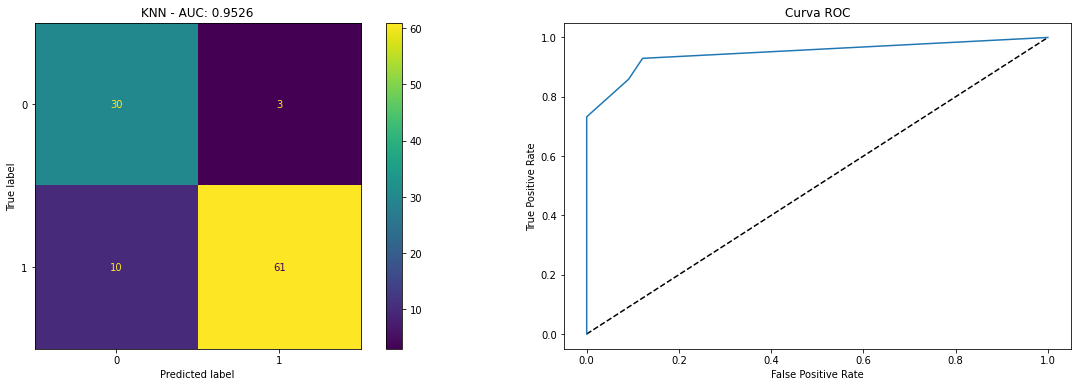

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        33
           1       0.95      0.86      0.90        71

    accuracy                           0.88       104
   macro avg       0.85      0.88      0.86       104
weighted avg       0.89      0.88      0.88       104

----------------------------------------------------------------------------------------------------------------------------------



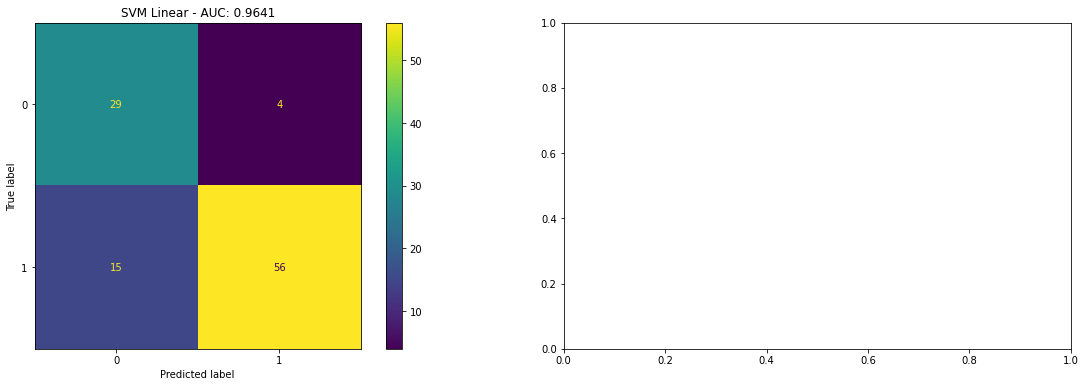

              precision    recall  f1-score   support

           0       0.66      0.88      0.75        33
           1       0.93      0.79      0.85        71

    accuracy                           0.82       104
   macro avg       0.80      0.83      0.80       104
weighted avg       0.85      0.82      0.82       104

----------------------------------------------------------------------------------------------------------------------------------



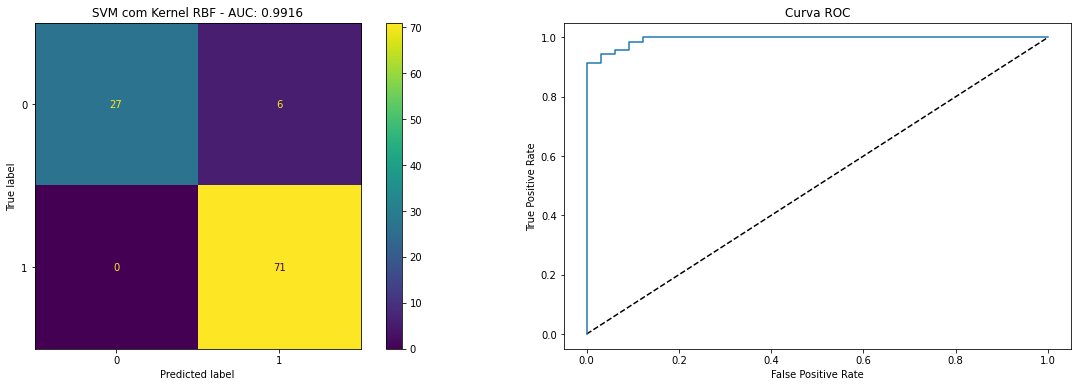

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        33
           1       0.92      1.00      0.96        71

    accuracy                           0.94       104
   macro avg       0.96      0.91      0.93       104
weighted avg       0.95      0.94      0.94       104

----------------------------------------------------------------------------------------------------------------------------------



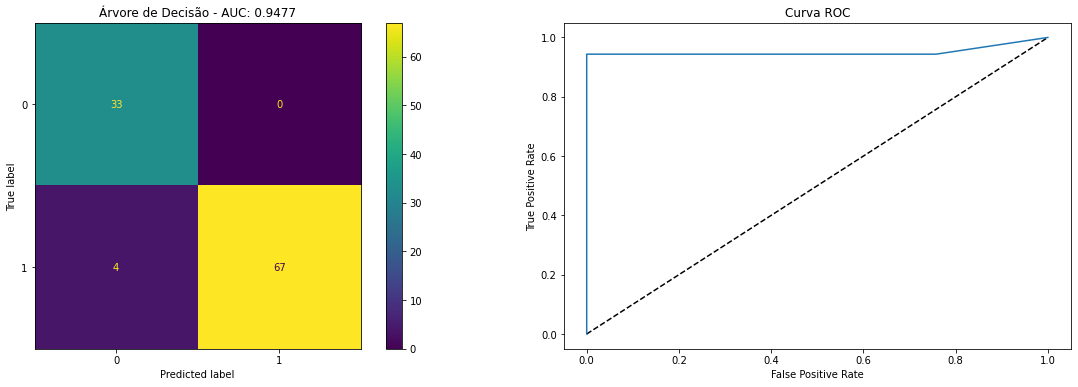

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.94      0.97        71

    accuracy                           0.96       104
   macro avg       0.95      0.97      0.96       104
weighted avg       0.97      0.96      0.96       104

----------------------------------------------------------------------------------------------------------------------------------



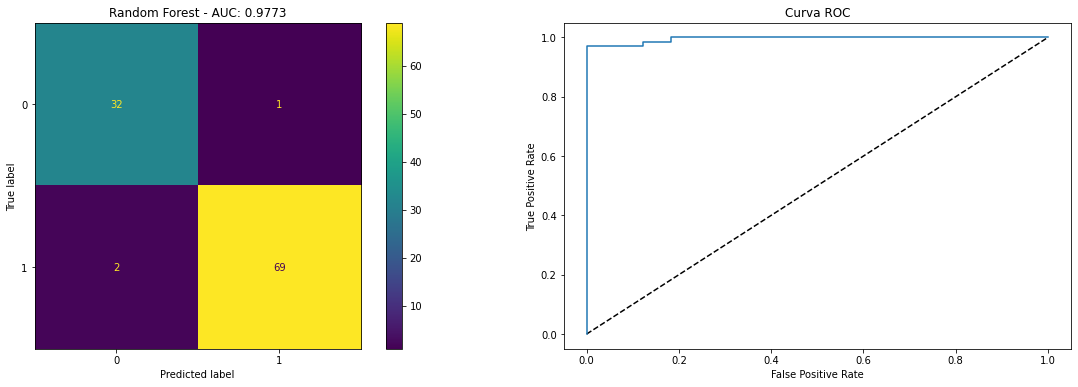

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.99      0.97      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104

----------------------------------------------------------------------------------------------------------------------------------



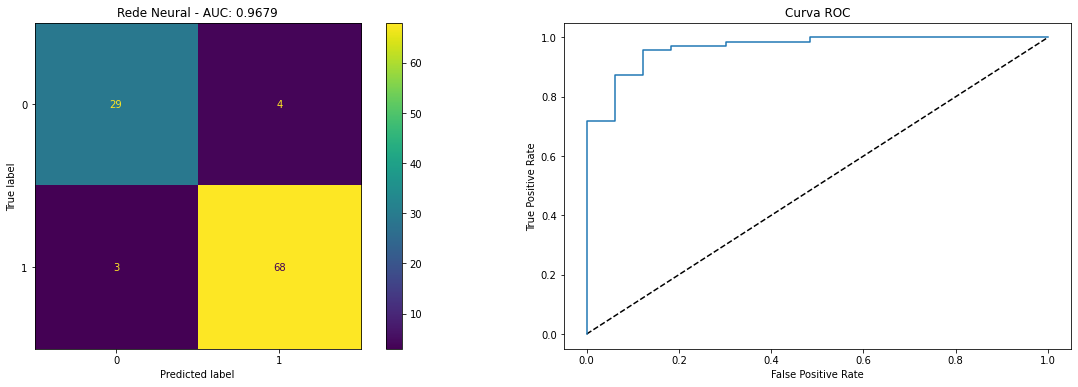

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.94      0.96      0.95        71

    accuracy                           0.93       104
   macro avg       0.93      0.92      0.92       104
weighted avg       0.93      0.93      0.93       104

----------------------------------------------------------------------------------------------------------------------------------



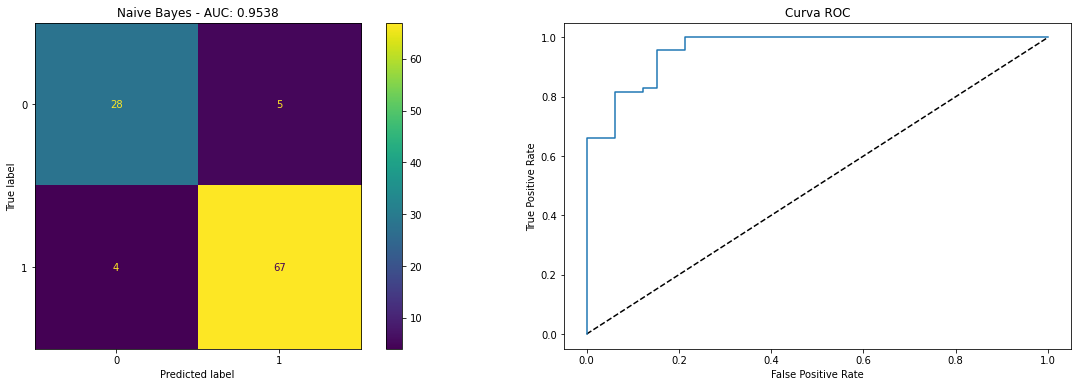

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104

----------------------------------------------------------------------------------------------------------------------------------



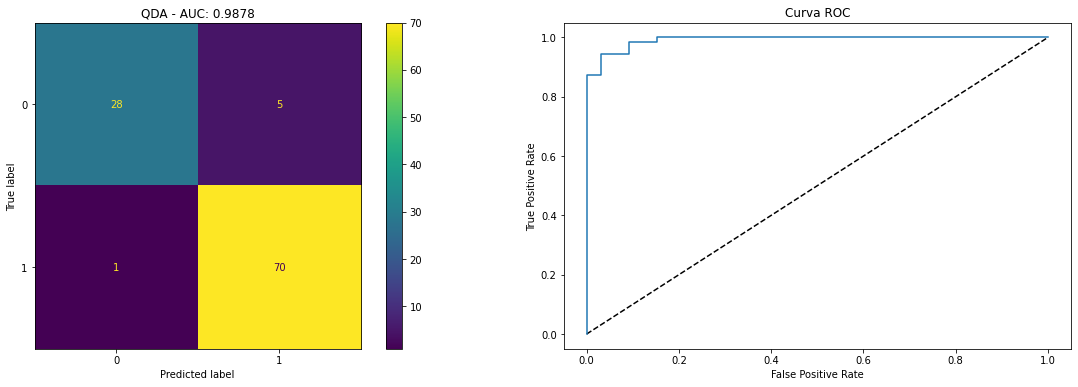

              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.93      0.99      0.96        71

    accuracy                           0.94       104
   macro avg       0.95      0.92      0.93       104
weighted avg       0.94      0.94      0.94       104

----------------------------------------------------------------------------------------------------------------------------------



In [48]:
# treinando os classificadores
for name, clf in clfs.items():

  # treina o modelo
  clf.fit(X_train, y_train)

  # calcula a métrica AUC
  cv_auc = cross_val_score(clf, X, y, cv=5, 
                           scoring='roc_auc')
  
  auc = np.mean(cv_auc).round(4)
  
  # realiza previsões com o modelo
  y_pred = clf.predict(X_test)

  # plota matriz de confusão
  fig, (ax1, ax2) = plt.subplots(ncols=2, 
                                 figsize=(20, 6))
  
  plot_confusion_matrix(clf, X_test, y_test, ax=ax1)
  
  ax1.set_title(f'{name} - AUC: {auc}')

  # plota a curva quando algoritmo cálcula as probabilidades
  if hasattr(clf, 'predict_proba'):

    # previsões de probabilidades para cada classe
    y_pred_prob = clf.predict_proba(X_test)[:, 1]

    # gera dados para curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, 
                                     y_pred_prob)
    
    # plota curva ROC
    ax2.plot([0, 1], [0, 1], 'k--')
    ax2.plot(fpr, tpr)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title(f'Curva ROC')

  # apresenta o plot
  plt.show()

  # imprime todas as métricas do modelo
  print(classification_report(y_test, 
                              y_pred), end='\n')
  print('-'*130, end='\n\n')

Link para as funções utilizadas:

- Métricas utilizando validação cruzada: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

- Plotagem da matrix de confusão: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

- Coletar dados da curva ROC: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html

- Gerar relatŕio com todas as métricas de calssificação: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

# Modelos promissores

In [49]:
# selecionando os 2 modelos mais promissores

# SVM com kernel RBF
svm = SVC(gamma=2, C=1, probability=True)
modelo_svm = svm.fit(X_train, y_train)

# análise discriminante quadrática
qda = QuadraticDiscriminantAnalysis()
modelo_qda = qda.fit(X_train, y_train)

A escolha acima foi baseada nas maiores métricas AUC dentre os modelos apresentados.

Também foi considerado que, para o problema de negócio em questão, cometer um erro falso negativo é mais grave do que o erro falso positivo.


In [50]:
# função para plotar curva de aprendizado
def plot_learning_curve(estimator, title, 
                        X, y, axes=None, ylim=None, 
                        cv=None, n_jobs=None, 
                        train_sizes=np.linspace(.1, 
                                                1.0, 
                                                5)):
  if axes is None:
    _, axes = plt.subplots(figsize=(15, 8))

  axes.set_title(title)

  if ylim is not None:
    axes.set_ylim(*ylim)
  axes.set_xlabel('Nº de registros')
  axes.set_ylabel('Acurácia')

  # obtençãp dos dados
  train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, 
                   train_sizes=train_sizes, 
                   return_times=True)
    
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)

  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  fit_times_mean = np.mean(fit_times, axis=1)
  fit_times_std = np.std(fit_times, axis=1)

  # plotagem da curva
  axes.grid()

  axes.fill_between(train_sizes, 
                  train_scores_mean - train_scores_std, 
                  train_scores_mean + train_scores_std, 
                  alpha=0.1, color='r')
  
  axes.fill_between(train_sizes, 
                  test_scores_mean - test_scores_std, 
                  test_scores_mean + test_scores_std, 
                  aplha=0.1, color='g')
  
  axes.plot(train_sizes, train_scores_mean, 
          'o-', color='r', label='Dados de treino')
  
  axes.plot(train_sizes, test_scores_mean, 
          'o-', color='g', label='Dados de teste com validação cruzada')
  
  axes.legend(loc='best')

  return plt



Link para função complete (Scikit-Learn): https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [53]:
# plot_learning_curve(modelo_svm, title='Curva de aprendizagem - SVM com Kernel Radial (RBF)', 
#                     X=X, y=y, cv=5, n_jobs=4)
                     
# plt.show()

In [55]:
# plot_learning_curve(modelo_qda, 
#                     title='Curva de aprendizagem - QDA', 
#                     X=X, y=y, cv=5) 
# plt.show()

# Realizando previsões como o modelo final

In [56]:
nova_pessoa = pd.DataFrame({
    'Idade':[56], 
    'Gênero':['Male'], 
    'Poliúria':['No'], 
    'Polidispsia':['No'], 
    'Perda repentina de peso':['Yes'], 
    'Fraqueza':['Yes'], 
    'Polifagia':['Yes'], 
    'Candidiase':['Yes'], 
    'Visão embaçada':['No'], 
    'Coceira':['No'], 
    'Irritações':['No'], 
    'Cicatrização prolongada':['Yes'], 
    'Paralisia parcial':['Yes'], 
    'Fraqueza muscular':['No'], 
    'Calvice':['No'], 
    'Obesidade':['Yes']
})

In [57]:
nova_pessoa.head()

,Idade,Gênero,Poliúria,Polidispsia,Perda repentina de peso,Fraqueza,Polifagia,Candidiase,Visão embaçada,Coceira,Irritações,Cicatrização prolongada,Paralisia parcial,Fraqueza muscular,Calvice,Obesidade
0,56,Male,No,No,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,Yes


In [58]:
# repetindo o pré-processamento dos dados
for col in nova_pessoa.select_dtypes(include='object').columns:
  if col == 'Gênero':
    nova_pessoa[col] = nova_pessoa[col].map({'Female': 0, 
                                             'Male': 1})
  else:
    nova_pessoa[col] = nova_pessoa[col].map({'No': 0, 'Yes': 1})

In [59]:
# fazendo previsões
# lembrando que {0: 'Negative', 1: 'Positive'} para a previsão de diabetes
modelo_qda.predict(nova_pessoa)

array([1], dtype=int8)

In [60]:
cv_scores = cross_val_score(modelo_qda, X, y, 
                            cv=5, scoring='roc_auc')

print(f'{np.mean(cv_scores).round(4)*100}%')

98.78%


# Considerações finais:

- Apesar de o modelo ter obtido uma precisão elevada __(AUC --> 98,78%)__, ele pode não ser representativo. Foram coletados poucos registros de pessoas de um único hospital, de uma única cidade, de um único país. Não foram encontradas informações sobre a coleta de dados, que pode conter um viés de amostragem. Seria interessante, para um projeto futuro, aplicar testes inferenciais estatísticas para avaliar se essa amostra do conjunto de dados se extende para a população como um todo.

- Outros fatores que não estavam presentes no conjunto de dados originais podem ser relevantes para o desenvolvimento de diabates, como hábitos alimentares e estilo de vida. Coletar maiores informações talvez ajudaria a ter um modelo mais generalizável e próximo do problema de negócio.

- Existem outras técnicas que poderiam ser aplicadas como `OneHotEncoding` para avaliar a influência de cada categoria `(sim/não, masculino/feminino)` de forma isolada no modelo.

# Referência de material para estudos:

- Golbal Report on Diabetes (WHO): https://www.who.int/diabetes/global-report/en/

- Diabetes - sintomas, causas e tratamentos (Ministério da Saúde): http://antigo.saude.gov.br/saude-de-a-z/diabetes

# Vídeo referencial de estudo:

- Link do vídeo:
https://www.youtube.com/watch?v=1SmDbnsEqq4&feature=youtu.be